In [1]:
from typing import Optional, List, Iterable, Tuple, Dict
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm

import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

In [2]:
from brownian_datagen import (BrownianDatagen,
                              create_dataholder_for_windows_and_targets,
                              create_simple_flip_dataholder_for_windows_and_targets)
from bayesian import plot_predictions, quality_metrics
from bayesian_varinf import (ExpResultsWithLosses,
                             ExpResultsWithTwoLosses,
                             posterior_predictive_forward_and_backward,
                             train_fb_n_times,
                             load_learning_curves)

(<Figure size 500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Forward trajectories'}, xlabel='index', ylabel='coordinate of the particle, forward'>,
        <Axes: title={'center': 'Backward trajectories'}, xlabel='index', ylabel='coordinate of the particle, backward'>,
        <Axes: title={'center': 'Work distributions'}>], dtype=object))

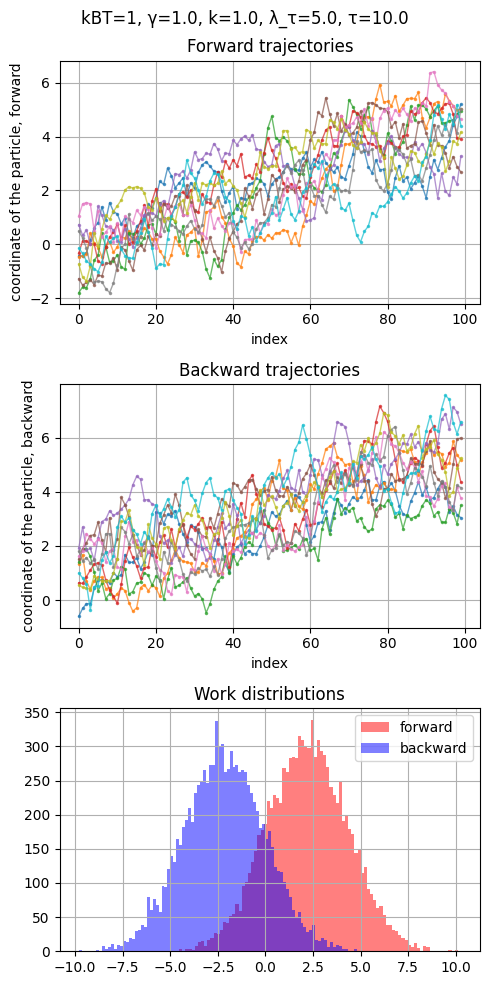

In [3]:
brownian = BrownianDatagen(kBT=1, γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_for_windows_and_targets(brownian, numParticles=50, rng_seed=42)
brownian.visualize()

In [5]:
save_dir_prefix = "20230724_preds/brownian_varinf_debugged/test9/"
num_runs = 200
train_fb_n_times(dt, num_runs=num_runs,
                 num_epochs=4000, save_metrics_every_n_epochs=100,
                 hidden_size=6, train_test_split_ratio=0.5,
                 save_dir_prefix=save_dir_prefix)

 11%|███████████▏                                                                                          | 22/200 [7:27:43<60:22:31, 1221.07s/it]


KeyboardInterrupt: 

In [ ]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="crps")
l.plot_learning_curves()

In [ ]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="rmse")
l.plot_learning_curves()

In [ ]:
for alt_metric in (None, "crps", "rmse", "mae", "mean_std"):
    l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric=alt_metric)
    l.plot_learning_curves(log_scale=False)

In [ ]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric=None)
l.plot_learning_curves(log_scale=False)
l.plot_relmeandiff_vs_epoch()